In [1]:
import numpy as np
%matplotlib notebook
# %matplotlib qt
import matplotlib.pyplot as plt
from matplotlib import cm

# Learning the American Sign Language alphabet with CNN

## Intro

The sign language is mostly used by deaf people and people who are physically unable to speak. This language is unfortunately not spoken by the majority. Thus making it difficult for deaf people to communicate with their surrounding. In some situations it can be of extreme importance to be able to communicate with a deaf person. For instance in hospitals a deaf patient might be asked what kind of medication he or she is on. The medical staff need such information to avoid a lethal drug cocktail. Nowadays few members of the medical staff are taught sign language. In this work we present a Convolutional Neural Network able to label the American Sign Language alphabet from a given image. Then we tried to investigate if the model can predict sign images that are different from the training data set. We hope that this could be the start to a sign language learning tool where the learner is asked to reproduce a letter of the alphabet and take a photograph. Then the CNN could check if the sign is correct. 

## The ASL data set

The ASL data set used in this work can be found [here](https://www.kaggle.com/grassknoted/asl-alphabet). The data set is composed of 87000 images which are 200x200 pixels with 3 color channels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING. Each class contains the same number of image. All images in the data set display a hand posture showing the sign. They are all displayed on the same background. The hand is the same for each sign. The main elements of distinction between the images are :

1. Light exposure
2. Position of the hand within the picture 
3. Distance of the hand to the camera
4. Angle of rotation of the hand

| ![asl_alphabel.jpg](https://www.nidcd.nih.gov/sites/default/files/Content%20Images/NIDCD-ASL-hands-2014.jpg) | 
|:--:| 
| *The ASL alphabet*|

 <table style="width:100%">
  <tr>
    <th><img src="files/asl_alphabet_train/A/A1.jpg">A</th>
    <th><img src="files/asl_alphabet_train/B/B1.jpg">B</th>
    <th><img src="files/asl_alphabet_train/C/C1.jpg">C</th>
    <th><img src="files/asl_alphabet_train/D/D2.jpg">D</th>
    <th><img src="files/asl_alphabet_train/E/E1.jpg">E</th>
  </tr>
    
   <tr>
    <th><img src="files/asl_alphabet_train/F/F1.jpg">F</th>
    <th><img src="files/asl_alphabet_train/G/G2.jpg">G</th>
    <th><img src="files/asl_alphabet_train/H/H1.jpg">H</th>
    <th><img src="files/asl_alphabet_train/I/I3.jpg">I</th>
    <th><img src="files/asl_alphabet_train/J/J3.jpg">J</th>
  </tr>
  
   
</table> 

Each letter of the alphabet is encoded as an integer using the alphanumeric order

In [2]:
import os
labels = os.listdir('asl_alphabet_test/')
labels.sort()

labels_dict = dict(zip(labels, np.arange(len(labels))))
labels = np.array(labels)
print(labels_dict)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}



### Image pre-processing

The images are reduced in size from (200, 200, 3) to (128, 128, 3) to reduce the computing time during of the learning phase. Each pixel value is rescaled to the maximum value of 255 to fit the [0, 1] range adapted to neural networks. The images are packed into batches of 64. The data was randomly shuffled. The image pre-processiong was performed with the `keras.preprocessing.image.ImageDataGenerator` class. For the validation data we used a 10% random set of the full data set. 

## Model building and training

In this work we build a CNN for image classification. The architecture consists of 2D convolutional layers followed by a 2D max-pooling layer. We repeated this several times. At the end of the 2D layers we connected a fully dense layers to reduce the data size to 29 (the number of classes). Each layer uses the Rectified Linear Unit activation function. For the final layer we used the softmax to predict a probability for each class. For the fitting we used, the categorical cross-entropy as loss function and the Adam optimizer. A summary of the architecture of the neural network can be found in the next cell. 

The model was trained on a NVIDIA TITAN X GPU at the HPC facilities [baobab](https://plone.unige.ch/distic/pub/hpc/baobab_en) of the University of Geneva.

In [3]:
from keras.models import load_model
model = load_model('model_6.h5')
print(model.summary())

/home/alispach/.anaconda3/envs/adv-comp-18/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
__________

## Results
### Accuracy

The CNN was trained for 20 epochs with 1224 batch iterations per epoch. On the next cell the loss and accuracy as a function of the epoch are shown. We observe that the accuracy of the model reaches $\sim 1$ at an early stage of the training (0.2 of the maximum epoch). We also observe that the loss reaches a minimum at $\sim 2 \cdot 10^{-3}$.

 <table style="width:100%">
  <tr>
    <th><th>
    <th>Loss</th>
    <th>Accurracy</th>
  </tr>
  <tr>
    <th>Train dataset<th>
    <th>0.0017633835955952338</th>
    <th>0.9995913154533844</th>
  </tr>
  
    <tr>
    <th>Validation dataset<th>
    <th>0.004516940894526638</th>
    <th>0.9988505747126437</th>
  </tr>
</table> 


<IPython.core.display.Javascript object>


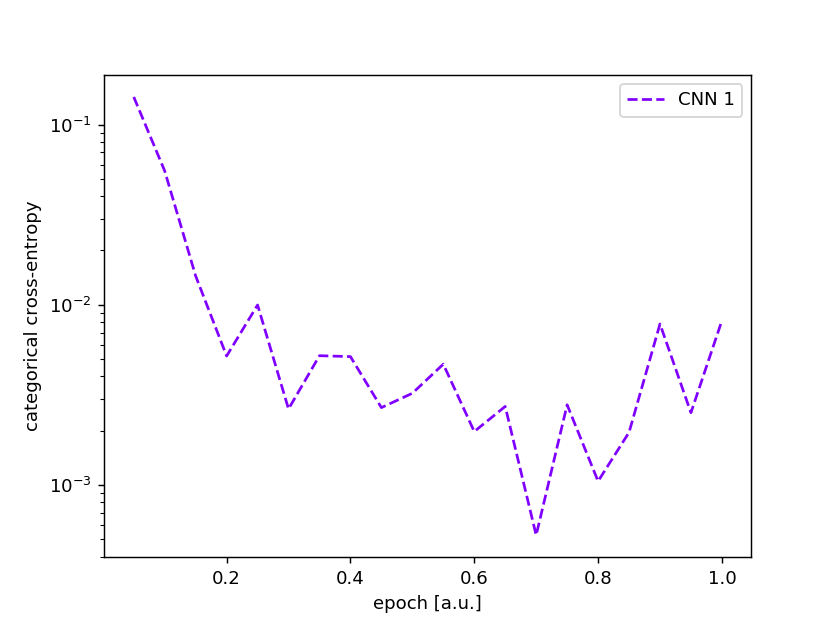

<IPython.core.display.Javascript object>


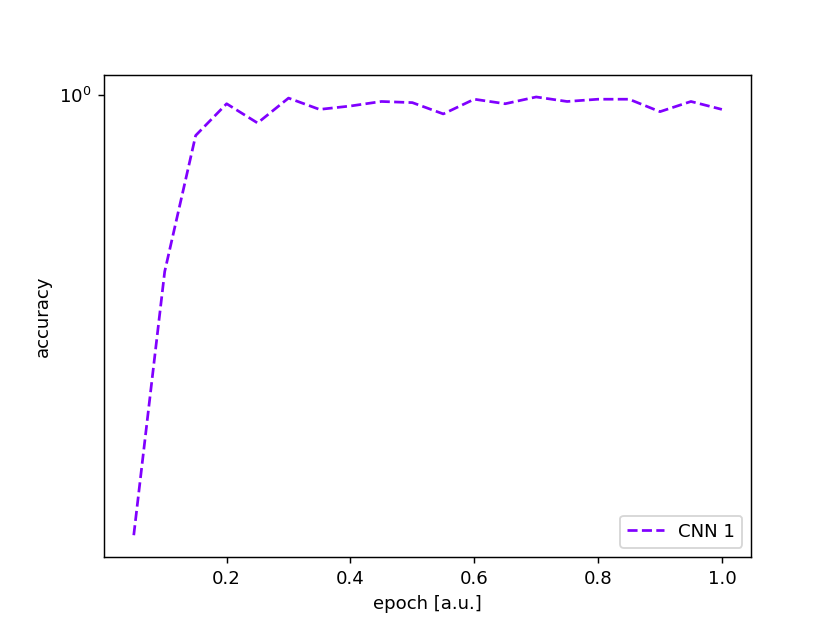

In [7]:
from utils import plot_history
from read import load_history
history = load_history('history_6.pk')
plot_history([history], labels=['1'])

### Confusion matrix

We are now interested in evaluating the output of each class. The confusion matrix on the training data set shows that the model is very accurate in predicting the correct sign. 

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


100%|██████████| 136/136 [03:27<00:00,  1.53s/it]

Confusion matrix, without normalization


<IPython.core.display.Javascript object>


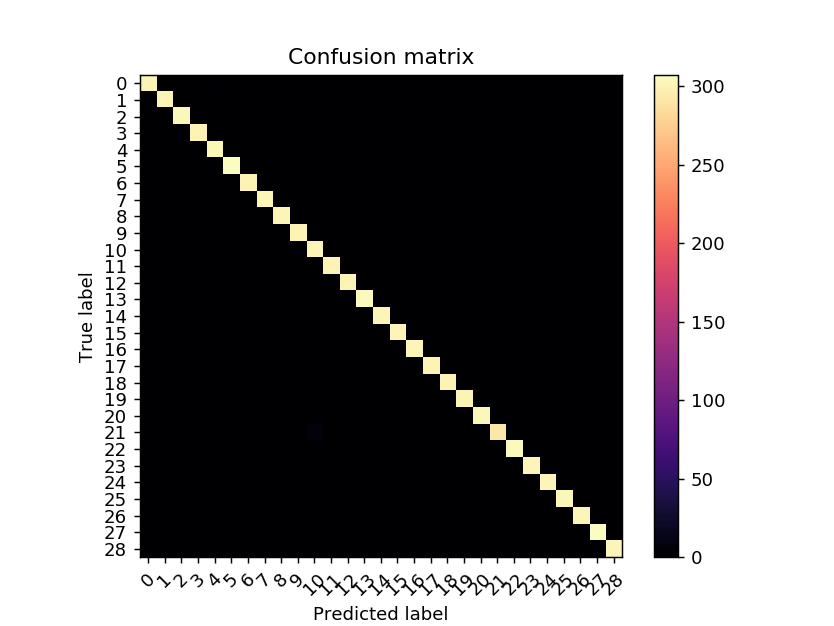

In [8]:
from utils import plot_confusion_matrix, compute_confusion_matrix
cf_matrix = compute_confusion_matrix(model, max_iter=10)
plot_confusion_matrix(cf_matrix)

## Testing on a different dataset

In the section we are interested to see if our model is able correctly interpret ASL images from a new data set. For this a set of 4 images were taken from this (website)[http://asl.ms/()/images2/abcslideshow.htm] . We try to see if the neural network is able to read the word "H-E-L-L-O". On the table below one can see the word "H-E-L-L-O" in the new data set and the data set used for training. For the new data set the prediction is given as images of the training data set. Then translated word by the model reads: "del-K-K-K-B". The prediction is completly wrong. This shows that the CNN is not able to read sign langange if the images differ from the training data set. The CNN is specialized in its training data set. To further improve this we would need to train the CNN on a larger data set with larger differences between the images. This study was not performed since we did not find any other data set for the ASL. 

However from this experiment we can try to make hypothesis on why the word "H-E-L-L-O" was translated as "del-K-K-K-B". First, we can see that the sign "H" features a right angle on the new data set which is also a feature of the "del" sign on the training data set. Second, the sign "L" on the new data set shows two fingers that form an angle which is also a feature of the "K" in the training data set. Third for the sign "O" in the new data set we can see that it is oriented at a different angle as for the training data set which could explain why the prediction is wrong. Finally concerning the sign "E" in the new dataset it is hard to come to a conclusion since there is no obivous similarities between the predicted and true sign.

 <table style="width:100%">
  <tr>
    <th>New dataset<th>
    <th><img src="files/asl_alphabet_new/H/H1.png">H</th>
    <th><img src="files/asl_alphabet_new/E/E1.png">E</th>
    <th><img src="files/asl_alphabet_new/L/L1.png">L</th>
    <th><img src="files/asl_alphabet_new/L/L1.png">L</th>
    <th><img src="files/asl_alphabet_new/O/O1.png">O</th>
  </tr>
  <tr>
    <th>Train dataset<th>
    <th><img src="files/asl_alphabet_train/H/H1.jpg">H</th>
    <th><img src="files/asl_alphabet_train/E/E1.jpg">E</th>
    <th><img src="files/asl_alphabet_train/L/L1.jpg">L</th>
    <th><img src="files/asl_alphabet_train/L/L1.jpg">L</th>
    <th><img src="files/asl_alphabet_train/O/O1.jpg">O</th>
  </tr>
  
    <tr>
    <th>Predictions<th>
    <th><img src="files/asl_alphabet_train/del/del1.jpg">del</th>
    <th><img src="files/asl_alphabet_train/K/K1.jpg">K</th>
    <th><img src="files/asl_alphabet_train/K/K1.jpg">K</th>
    <th><img src="files/asl_alphabet_train/K/K1.jpg">K</th>
    <th><img src="files/asl_alphabet_train/B/B1.jpg">B</th>
  </tr>
  
      <tr>
    <th>Predictions probability<th>
    <th>0.7271189</th>
    <th>0.5736201</th>
    <th>0.99999654</th>
    <th>0.99999654</th>
    <th>0.6743274</th>
  </tr>
   
</table> 



In [9]:
from read import get_new_data
data_generator = get_new_data(path='asl_alphabet_new/')

labels_new = os.listdir('asl_alphabet_new/')
labels_new.sort()

new_data = []
for i, data in enumerate(data_generator):
    
    if i > 3:
        break
    new_data.append(data[0][0])
    

new_data = np.array(new_data)
word = ['H', 'E', 'L', 'L', 'O']
label_from_word = np.array([labels_dict[letter] for letter in word])

X_predict = []
for letter in word:
    
    where = labels_new.index(letter)
    X_predict.append(new_data[where])
    
X_predict = np.array(X_predict)

y_predict = model.predict(X_predict)
y_prob = np.max(y_predict, axis=-1)
y_class = np.argmax(y_predict, axis=-1)
y_class = y_class.astype(int)
y_prob_to_be_correct = [y_predict[i, label_from_word[i]] for i in range(len(label_from_word))]

print('\n Intial sentence :', word, '\n', 'Prediction : '
      , labels[y_class], '\n', 'Prediction probability :', y_prob, '\n',
     'Intial sentence probability : ', y_prob_to_be_correct)

Found 4 images belonging to 4 classes.

 Intial sentence : ['H', 'E', 'L', 'L', 'O'] 
 Prediction :  ['del' 'K' 'K' 'K' 'B'] 
 Prediction probability : [0.7271189  0.5736201  0.99999654 0.99999654 0.6743274 ] 
 Intial sentence probability :  [6.9446733e-06, 1.2144792e-05, 1.1181615e-10, 1.1181615e-10, 0.00075437716]


# Conclusions

In this work we were able to construct an accurate CNN to classify images of the ASL alphabet, reaching $\sim 0.9989$ on the validation data set. The accuracy reached showed CNNs are excelent tools to learn the ASL alphabet. However a study performed on a different data set showed that the model could not classify any image of the ASL alphabet. The results on a different data set demonstrated that the CNN is specialized on the training dataset only. In the future we would like to train a CNN on a larger data set. The images in the training dataset seem to come from the same origin. It is likely that the speakers of the ASL use slightly different signs for the same letter of the alphabet. For that reason, we need a data set with higher variance to build an accurante and universal CNN. In the future we would like to explore what features of the images the CNN is indentifying. For this we could look at saliency maps.

Usefull references : 
- https://blog.keras.io/building-autoencoders-in-keras.html
- https://rajpurkar.github.io/mlx/visualizing-cnns/
- https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258
- https://www.kaggle.com/dansbecker/benchmarking-model-training-with-a-cpu
- https://www.kaggle.com/grassknoted/asl-alphabet
- https://github.com/calispac/advanced-computing-2018
- https://www.nidcd.nih.gov/sites/default/files/Content%20Images/NIDCD-ASL-hands-2014.jpg